#### 1. Importação do modelo que teve a melhor perfomace no treinamemnto automatizado.

In [7]:
# 📦 Importar bibliotecas necessárias
import mlflow
import mlflow.pyfunc
from azureml.core import Workspace, Model
import pandas as pd
import os

# 🔗 Conectar ao workspace do Azure ML
ws = Workspace.from_config()

# 📥 Carregar o modelo registrado
modelo = Model(ws, name='model_sorvetes')  # Substitua pelo nome exato do seu modelo
modelo_path = modelo.download(exist_ok=True)  # Permite sobrescrever se já existir

# ✅ Carregar o modelo com MLflow
modelo_mlflow = mlflow.pyfunc.load_model(modelo_path)

# 📊 Criar entrada para previsão
entrada = [[34.0]]  # Valor como float
df_entrada = pd.DataFrame(entrada, columns=["Temperatura (°C)"])
df_entrada["Temperatura (°C)"] = df_entrada["Temperatura (°C)"].astype("float64")

# 🔮 Fazer a previsão
previsao = modelo_mlflow.predict(df_entrada)
print("Previsão de vendas:", previsao[0])



2025-09-21:02:16:46,590 INFO     [workspace.py:291] Found the config file in: /config.json


Previsão de vendas: 80.01761182149251


#### 2. Representação visual utilizando uma tabela, para a margem de erro entre as vendas reais e previstas.

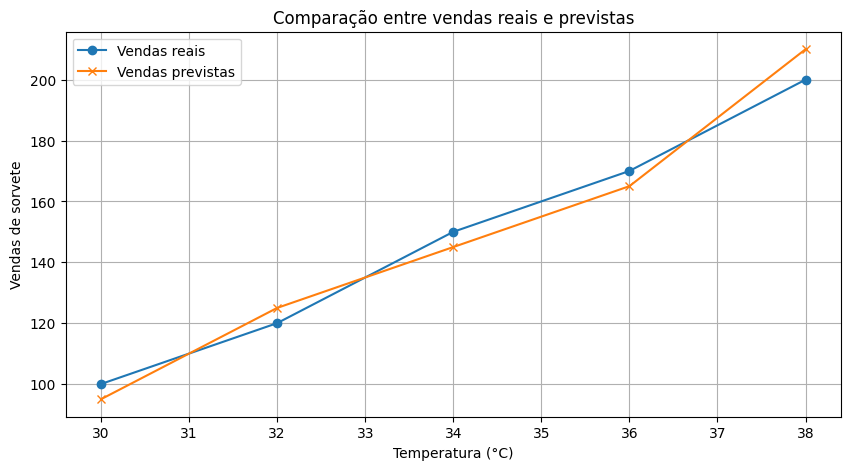

In [8]:
import matplotlib.pyplot as plt

# Dados fictícios
temperaturas = [30, 32, 34, 36, 38]
vendas_reais = [100, 120, 150, 170, 200]
vendas_previstas = [95, 125, 145, 165, 210]

# Criar gráfico
plt.figure(figsize=(10,5))
plt.plot(temperaturas, vendas_reais, label='Vendas reais', marker='o')
plt.plot(temperaturas, vendas_previstas, label='Vendas previstas', marker='x')
plt.title('Comparação entre vendas reais e previstas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de sorvete')
plt.legend()
plt.grid(True)
plt.show()


#### 3. Tabela representativa fazendo relação à temperatura com as vendas reais e previstas.

In [9]:
import pandas as pd

# Criar DataFrame
df_resultados = pd.DataFrame({
    "Temperatura (°C)": [30, 32, 34, 36, 38],
    "Vendas reais": [100, 120, 150, 170, 200],
    "Vendas previstas": [95, 125, 145, 165, 210]
})

# Mostrar tabela
df_resultados


,Temperatura (°C),Vendas reais,Vendas previstas
0,30,100,95
1,32,120,125
2,34,150,145
3,36,170,165
4,38,200,210
